In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [6]:
df3=pd.read_csv("final_data.csv")
df = pd.read_csv("clustered_data.csv")

In [4]:
df3.head(3)

,company_name,stock_symbol,market_value,total_shares,shares_outstanding,par_value,price_to_book,dividend_yield,enterprise_value,sector,industry
0,شركة الزيت العربية السعودية,2222,6763900.00,242000.0,6.15,10.0,4.54,6.07,6947990.00,Energy,Oil & Gas Integrated
1,شركة المصافي العربية السعودية,2030,1110.00,15.0,25.33,10.0,2.92,0.00,774.76,Industrials,Conglomerates
2,شركة رابغ للتكرير والبتروكيماويات,2380,13585.23,1671.0,6.33,10.0,1.28,0.00,41869.81,Energy,Oil & Gas Refining & Marketing


In [8]:
df

,company_name,stock_symbol,market_value,total_shares,book_value,par_value,price_to_book,dividend_yield,enterprise_value,sector,industry,market_value_per_share,ev_to_mv_ratio,dividend_per_share,encoded_sector,cluster
0,شركة الزيت العربية السعودية,2222,6763900.00,242000.00,6.15,10.0,4.54,6.07,6947990.00,Energy,Oil & Gas Integrated,27.950000,1.027217,1.696565,4,0
1,شركة المصافي العربية السعودية,2030,1110.00,15.00,25.33,10.0,2.92,0.00,774.76,Industrials,Conglomerates,74.000000,0.697982,0.000000,7,1
2,شركة رابغ للتكرير والبتروكيماويات,2380,13585.23,1671.00,6.33,10.0,1.28,0.00,41869.81,Energy,Oil & Gas Refining & Marketing,8.130000,3.082010,0.000000,4,1
3,الشركة الوطنية السعودية للنقل البحري,4030,21077.89,738.28,17.77,10.0,1.61,1.92,27573.13,Industrials,Marine Shipping,28.549995,1.308154,0.548160,7,1
4,شركة الدريس للخدمات البترولية و النقليات,4200,13040.00,100.00,13.90,10.0,9.38,0.57,12967.85,Consumer Cyclical,Specialty Retail,130.400000,0.994467,0.743280,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,شركة المعمر لأنظمة المعلومات,7200,5664.00,30.00,13.90,10.0,13.58,0.80,6403.64,Technology,Information Technology Services,188.800000,1.130586,1.510400,9,1
238,الشركة العربية لخدمات الإنترنت والاتصالات,7202,30000.00,120.00,30.69,10.0,8.08,2.40,26640.00,Communication Services,NaN,250.000000,0.888000,6.000000,1,2
239,شركة علم,7203,90112.00,80.00,59.79,10.0,18.30,0.67,84370.00,Technology,Information Technology Services,1126.400000,0.936279,7.546880,9,2
240,شركة العرض المتقن للخدمات التجارية,7204,4230.00,300.00,1.68,1.0,9.00,0.00,4230.00,Technology,NaN,14.100000,1.000000,0.000000,9,1


In [9]:
df['sector'].value_counts()

sector
Financial Services        42
Basic Materials           37
Industrials               35
Consumer Cyclical         33
Real Estate               28
Consumer Defensive        27
Healthcare                15
Communication Services    10
Energy                     6
Technology                 5
Utilities                  4
Name: count, dtype: int64

In [10]:
df['encoded_sector'].value_counts()

encoded_sector
5     42
0     37
7     35
2     33
8     28
3     27
6     15
1     10
4      6
9      5
10     4
Name: count, dtype: int64

In [394]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   company_name        242 non-null    object 
 1   stock_symbol        242 non-null    int64  
 2   market_value        242 non-null    float64
 3   total_shares        242 non-null    float64
 4   shares_outstanding  221 non-null    float64
 5   par_value           242 non-null    float64
 6   price_to_book       242 non-null    float64
 7   dividend_yield      242 non-null    float64
 8   enterprise_value    242 non-null    float64
 9   sector              242 non-null    object 
 10  industry            88 non-null     object 
dtypes: float64(7), int64(1), object(3)
memory usage: 20.9+ KB


In [396]:
# Create a dictionary mapping 'stock_symbol' to the value you want to insert
missing_values = {
    4002:16.39,
    4330:8.54,
    4336:7.62,
    4338:9.00,
    4340:8.03,
    4339:8.23,
    4345:7.33,
    4346:7.00,
    4020:12.66
}


# Iterate through the dictionary and update the DataFrame
for symbol, value in missing_values.items():
    df3.loc[(df3['stock_symbol'] == symbol) & (df3['shares_outstanding'].isnull()), 'shares_outstanding'] = value

# Verify that null values are filled
print(df3['shares_outstanding'].isnull().sum())  # Should be 0 after filling all


12


In [398]:
df3.rename(columns={'shares_outstanding': 'book_value'}, inplace=True)
mean_value = df3['book_value'].mean()
df3['book_value'].fillna(mean_value, inplace=True)

C:\Users\ohoud\AppData\Local\Temp\ipykernel_8696\1853046519.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [400]:
df3['market_value_per_share'] = df3['market_value'] / df3['total_shares']
df3['ev_to_mv_ratio'] = df3['enterprise_value'] / df3['market_value']
df3['dividend_per_share'] = (df3['dividend_yield'] / 100) * df3['market_value'] / df3['total_shares'] 

In [402]:
df3.head(5)

,company_name,stock_symbol,market_value,total_shares,book_value,par_value,price_to_book,dividend_yield,enterprise_value,sector,industry,market_value_per_share,ev_to_mv_ratio,dividend_per_share
0,شركة الزيت العربية السعودية,2222,6763900.00,242000.00,6.15,10.0,4.54,6.07,6947990.00,Energy,Oil & Gas Integrated,27.950000,1.027217,1.696565
1,شركة المصافي العربية السعودية,2030,1110.00,15.00,25.33,10.0,2.92,0.00,774.76,Industrials,Conglomerates,74.000000,0.697982,0.000000
2,شركة رابغ للتكرير والبتروكيماويات,2380,13585.23,1671.00,6.33,10.0,1.28,0.00,41869.81,Energy,Oil & Gas Refining & Marketing,8.130000,3.082010,0.000000
3,الشركة الوطنية السعودية للنقل البحري,4030,21077.89,738.28,17.77,10.0,1.61,1.92,27573.13,Industrials,Marine Shipping,28.549995,1.308154,0.548160
4,شركة الدريس للخدمات البترولية و النقليات,4200,13040.00,100.00,13.90,10.0,9.38,0.57,12967.85,Consumer Cyclical,Specialty Retail,130.400000,0.994467,0.743280


In [404]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   company_name            242 non-null    object 
 1   stock_symbol            242 non-null    int64  
 2   market_value            242 non-null    float64
 3   total_shares            242 non-null    float64
 4   book_value              242 non-null    float64
 5   par_value               242 non-null    float64
 6   price_to_book           242 non-null    float64
 7   dividend_yield          242 non-null    float64
 8   enterprise_value        242 non-null    float64
 9   sector                  242 non-null    object 
 10  industry                88 non-null     object 
 11  market_value_per_share  242 non-null    float64
 12  ev_to_mv_ratio          242 non-null    float64
 13  dividend_per_share      242 non-null    float64
dtypes: float64(10), int64(1), object(3)
memory

In [407]:
df3.to_csv('output_file.csv', index=False)


In [409]:
df=pd.read_csv("output_file.csv")

In [411]:
df.head(5)

,company_name,stock_symbol,market_value,total_shares,book_value,par_value,price_to_book,dividend_yield,enterprise_value,sector,industry,market_value_per_share,ev_to_mv_ratio,dividend_per_share
0,شركة الزيت العربية السعودية,2222,6763900.00,242000.00,6.15,10.0,4.54,6.07,6947990.00,Energy,Oil & Gas Integrated,27.950000,1.027217,1.696565
1,شركة المصافي العربية السعودية,2030,1110.00,15.00,25.33,10.0,2.92,0.00,774.76,Industrials,Conglomerates,74.000000,0.697982,0.000000
2,شركة رابغ للتكرير والبتروكيماويات,2380,13585.23,1671.00,6.33,10.0,1.28,0.00,41869.81,Energy,Oil & Gas Refining & Marketing,8.130000,3.082010,0.000000
3,الشركة الوطنية السعودية للنقل البحري,4030,21077.89,738.28,17.77,10.0,1.61,1.92,27573.13,Industrials,Marine Shipping,28.549995,1.308154,0.548160
4,شركة الدريس للخدمات البترولية و النقليات,4200,13040.00,100.00,13.90,10.0,9.38,0.57,12967.85,Consumer Cyclical,Specialty Retail,130.400000,0.994467,0.743280


In [413]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   company_name            242 non-null    object 
 1   stock_symbol            242 non-null    int64  
 2   market_value            242 non-null    float64
 3   total_shares            242 non-null    float64
 4   book_value              242 non-null    float64
 5   par_value               242 non-null    float64
 6   price_to_book           242 non-null    float64
 7   dividend_yield          242 non-null    float64
 8   enterprise_value        242 non-null    float64
 9   sector                  242 non-null    object 
 10  industry                88 non-null     object 
 11  market_value_per_share  242 non-null    float64
 12  ev_to_mv_ratio          242 non-null    float64
 13  dividend_per_share      242 non-null    float64
dtypes: float64(10), int64(1), object(3)
memory

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['encoded_sector'] = le.fit_transform(df['sector'])

In [417]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   company_name            242 non-null    object 
 1   stock_symbol            242 non-null    int64  
 2   market_value            242 non-null    float64
 3   total_shares            242 non-null    float64
 4   book_value              242 non-null    float64
 5   par_value               242 non-null    float64
 6   price_to_book           242 non-null    float64
 7   dividend_yield          242 non-null    float64
 8   enterprise_value        242 non-null    float64
 9   sector                  242 non-null    object 
 10  industry                88 non-null     object 
 11  market_value_per_share  242 non-null    float64
 12  ev_to_mv_ratio          242 non-null    float64
 13  dividend_per_share      242 non-null    float64
 14  encoded_sector          242 non-null    in

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [421]:
# Load the data (assuming it's already in a DataFrame called `df`)
numeric_features = ['market_value_per_share', 'ev_to_mv_ratio', 'dividend_per_share', 
                    'encoded_sector']

# Drop rows with missing values (optional, if you want to include `industry`)
df_cleaned = df[numeric_features].dropna()

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cleaned)


C:\Users\ohoud\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\ohoud\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\ohoud\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\ohoud\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

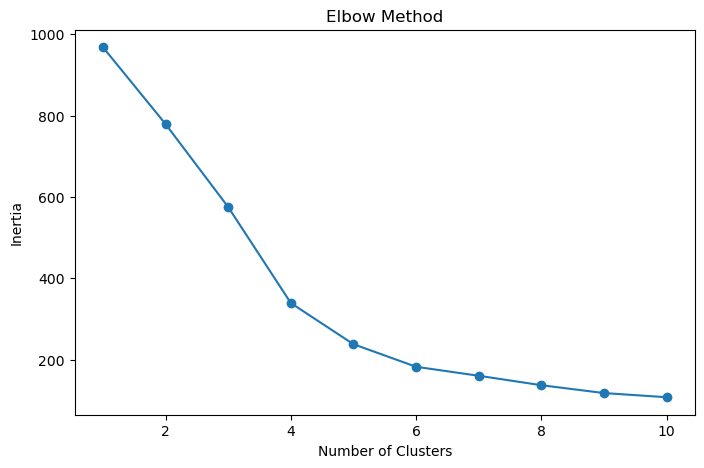

In [423]:
# Elbow method to find the optimal number of clusters
inertia = []
k_range = range(1, 11)  # Test for k=1 to k=10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


In [425]:
# Apply KMeans with the optimal number of clusters (e.g., k=3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_cleaned['cluster'] = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original DataFrame
df['cluster'] = kmeans.labels_


C:\Users\ohoud\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



In [427]:
print(df['cluster'].value_counts())


cluster
1    124
0    105
2     13
Name: count, dtype: int64


In [429]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
sil_score = silhouette_score(X_scaled, kmeans.labels_)
print(f"Silhouette Score: {sil_score}")


Silhouette Score: 0.4204352736186376


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Add PCA components and cluster labels to a DataFrame
df_visualization = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
df_visualization['Cluster'] = kmeans.labels_

# Scatter plot of the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_visualization, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=100)
plt.title('KMeans Clusters Visualization in 2D', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='Cluster')
plt.show()


In [433]:
df.head(2)

,company_name,stock_symbol,market_value,total_shares,book_value,par_value,price_to_book,dividend_yield,enterprise_value,sector,industry,market_value_per_share,ev_to_mv_ratio,dividend_per_share,encoded_sector,cluster
0,شركة الزيت العربية السعودية,2222,6763900.0,242000.0,6.15,10.0,4.54,6.07,6947990.00,Energy,Oil & Gas Integrated,27.95,1.027217,1.696565,4,0
1,شركة المصافي العربية السعودية,2030,1110.0,15.0,25.33,10.0,2.92,0.00,774.76,Industrials,Conglomerates,74.00,0.697982,0.000000,7,1


In [435]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Add the cluster column for grouping
numeric_columns['cluster'] = df['cluster']

# Calculate the mean for each cluster
cluster_means = numeric_columns.groupby('cluster').mean()

# Display the results
print(cluster_means)


         stock_symbol  market_value  total_shares  book_value  par_value  \
cluster                                                                    
0         3508.333333  75570.513619   2709.960476   13.878190  10.261905   
1         4341.233871  14597.259435    461.541855   13.051572   9.302500   
2         3767.076923  53839.627692    198.556154   32.855699  10.000000   

         price_to_book  dividend_yield  enterprise_value  \
cluster                                                    
0             3.884381        1.671714      78570.454286   
1             3.144919        2.026774      22871.797581   
2             8.834615        2.884615      54950.972308   

         market_value_per_share  ev_to_mv_ratio  dividend_per_share  
cluster                                                              
0                     44.939696        1.149926            0.687148  
1                     37.328432        9.758784            0.581866  
2                    286.523876       

In [437]:
# Calculate the mean for the selected columns per cluster
cluster_means_selected = df.groupby('cluster')[['market_value_per_share', 'ev_to_mv_ratio', 'dividend_per_share', 'encoded_sector']].mean()

# Display the results
print(cluster_means_selected)

         market_value_per_share  ev_to_mv_ratio  dividend_per_share  \
cluster                                                               
0                     44.939696        1.149926            0.687148   
1                     37.328432        9.758784            0.581866   
2                    286.523876        0.986031            5.401975   

         encoded_sector  
cluster                  
0              1.514286  
1              6.564516  
2              4.769231  


In [439]:
df.to_csv('clustered_data.csv', index=False)


In [441]:
# Group by 'cluster' and 'encoded_sector' (or 'sector' if you want the original sector names)
sector_cluster_counts = df.groupby(['cluster', 'sector']).size().unstack(fill_value=0)

# Display the counts for each cluster and sector
print(sector_cluster_counts)


sector   Basic Materials  Communication Services  Consumer Cyclical  \
cluster                                                               
0                     36                       9                 32   
1                      0                       0                  0   
2                      1                       1                  1   

sector   Consumer Defensive  Energy  Financial Services  Healthcare  \
cluster                                                               
0                        26       2                   0           0   
1                         0       2                  40          13   
2                         1       2                   2           2   

sector   Industrials  Real Estate  Technology  Utilities  
cluster                                                   
0                  0            0           0          0  
1                 34           28           4          3  
2                  1            0           1       

-----------------------------------------------------------